# Using the cleaned version of our data

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# path ='C:\PUJAMS\machinelearning\csvfiles\autos-super-clean.csv'
# data = pd.read_csv(path, sep=',',encoding='Latin1')
data = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\autos-super-clean.csv')
data.head(5)

Unnamed: 0          dateCrawled  price vehicleType  yearOfRegistration  \
0           3  2016-03-17 16:54:04   1500  kleinwagen                2001   
1           4  2016-03-31 17:25:20   3600  kleinwagen                2008   
2           5  2016-04-04 17:36:23    650   limousine                1995   
3           6  2016-04-01 20:48:51   2200      cabrio                2004   
4          10  2016-03-26 19:54:18   2000   limousine                2004   

   gearbox  powerPS    model  kilometer  monthOfRegistration fuelType  \
0  manuell       75     golf     150000                    6   benzin   
1  manuell       69    fabia      90000                    7   diesel   
2  manuell      102      3er     150000                   10   benzin   
3  manuell      109  2_reihe     150000                    8   benzin   
4  manuell      105  3_reihe     150000                   12   benzin   

        brand notRepairedDamage          dateCreated  postalCode  \
0  volkswagen              nein  2016-03-17 00:00:00       91074   
1       skoda              nein  2016-03-31 00:00:00       60437   
2         bmw                ja  2016-04-04 00:00:00       33775   
3     peugeot              nein  2016-04-01 00:00:00       67112   
4       mazda              nein  2016-03-26 00:00:00       96224   

              lastSeen  
0  2016-03-17 17:40:17  
1  2016-04-06 10:17:21  
2  2016-04-06 19:17:07  
3  2016-04-05 18:18:39  
4  2016-04-06 10:45:34

In [7]:
print(data.describe())

          Unnamed: 0          price  yearOfRegistration        powerPS  \
count  247872.000000  247872.000000       247872.000000  247872.000000   
mean   185696.076632    6787.990713         2003.492750     129.290186   
std    107275.087688    8030.235988            6.407951      62.041806   
min         3.000000       1.000000         1910.000000       1.000000   
25%     92657.750000    1690.000000         2000.000000      86.000000   
50%    185639.500000    3999.000000         2004.000000     116.000000   
75%    278646.500000    8900.000000         2008.000000     158.000000   
max    371527.000000   99999.000000         2016.000000     999.000000   

           kilometer  monthOfRegistration     postalCode  
count  247872.000000        247872.000000  247872.000000  
mean   123734.225729             6.222046   52133.032678  
std     39854.372670             3.445869   25822.202496  
min      5000.000000             0.000000    1067.000000  
25%    100000.000000             3.000

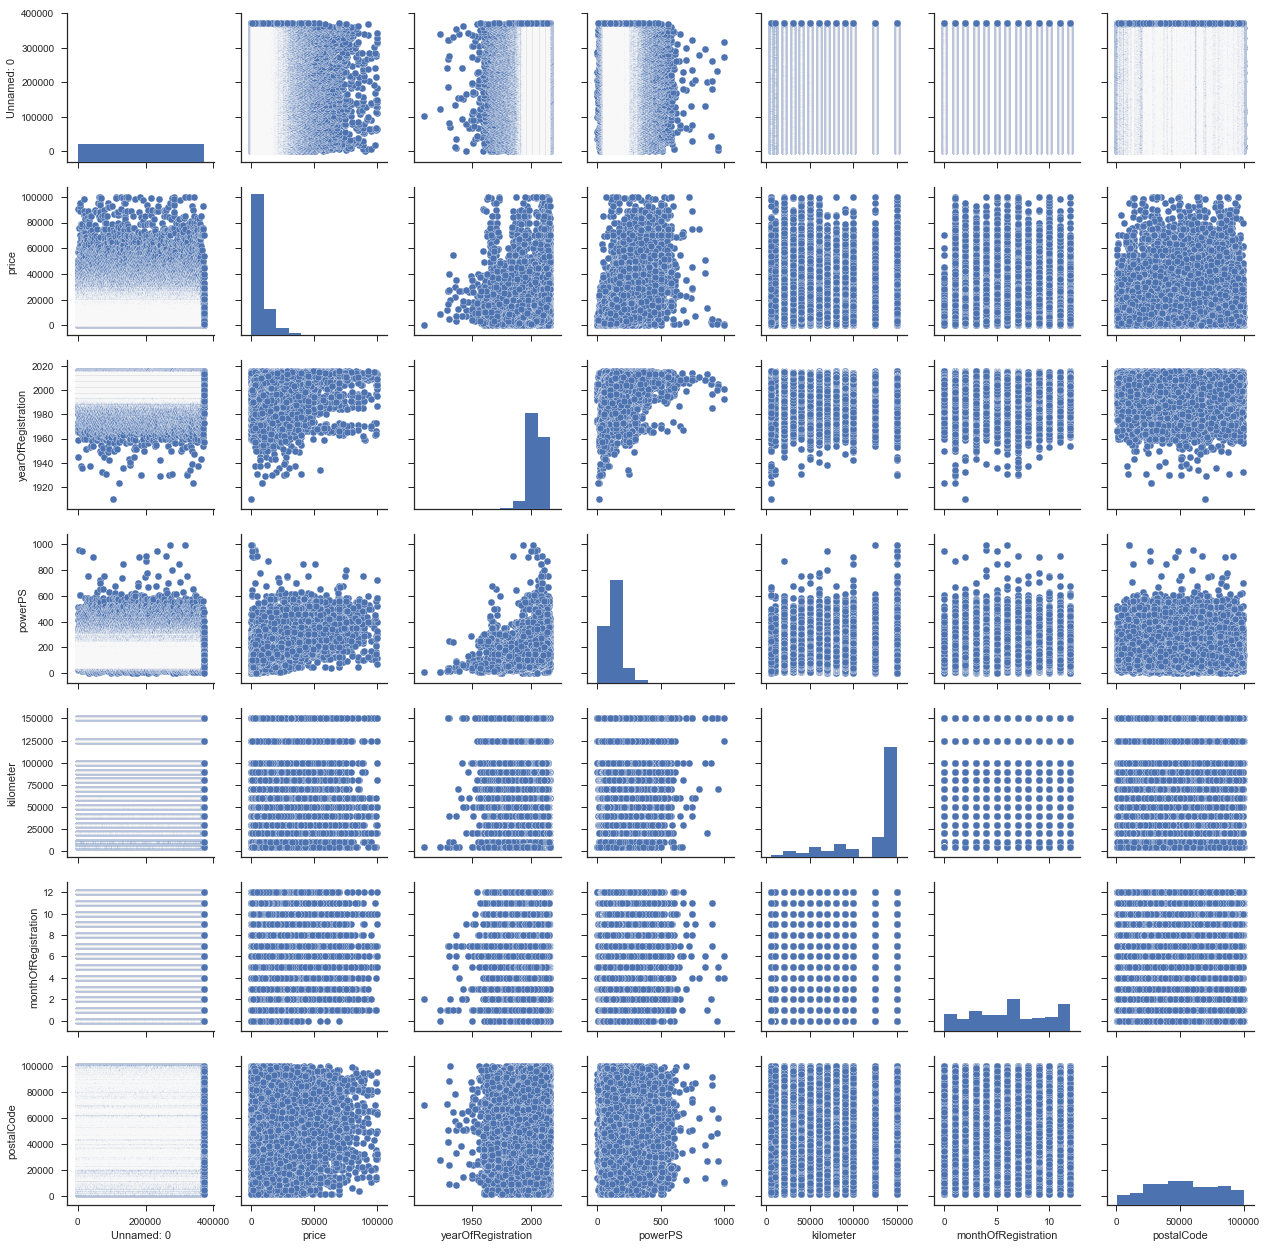

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

# Create new feature 'yearsOld' to estimate how old the car would be

In [55]:
pd.options.mode.chained_assignment = None  # default='warn'
import math
data['date_crawled']= pd.to_datetime(data['dateCrawled'])
data['year_registered'] = data['yearOfRegistration'].apply(lambda x: str(x))
data['month_registered'] = data['monthOfRegistration'].apply(lambda x: str(x))
data['date_crawled_year']= data['dateCrawled'].apply(lambda x: int(x.split('-')[0]))

data['yearsOld'] =  data['date_crawled_year'] - data['yearOfRegistration'];
data.head(1)

Unnamed: 0          dateCrawled  price vehicleType  yearOfRegistration  \
0           3  2016-03-17 16:54:04   1500  kleinwagen                2001   

   gearbox  powerPS model  kilometer  monthOfRegistration  \
0  manuell       75  golf     150000                    6   

              ...              jaguar repaired peugeot fiat  seat toyota  \
0             ...                   0        0       0    0     0      0   

  nissan kia oldandheavilyUsed  oldandheavilyUsedAndDamaged  
0      0   0           2250000                            0  

[1 rows x 66 columns]

# Create new label 'less_expensive', which would be flagged as 1 incase price is less that 8000 euros or else it would be flagged '0'

In [56]:
data['less_expensive']  = data['price'].apply(lambda x: 1 if (x <= 8000)  else 0)
data.head(1)

Unnamed: 0          dateCrawled  price vehicleType  yearOfRegistration  \
0           3  2016-03-17 16:54:04   1500  kleinwagen                2001   

   gearbox  powerPS model  kilometer  monthOfRegistration  \
0  manuell       75  golf     150000                    6   

              ...              jaguar repaired peugeot fiat  seat toyota  \
0             ...                   0        0       0    0     0      0   

  nissan kia oldandheavilyUsed  oldandheavilyUsedAndDamaged  
0      0   0           2250000                            0  

[1 rows x 66 columns]

# Creating categorical variables using One-hot-encoding

In [57]:
data['gearbox_category'] = data['gearbox'].apply(lambda x: 0 if (x == 'manuell') else 1)
data1 = data;
# there are 7 unique fuel types, we can create a categorical variable for each one of them
#array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
data1['benzin'] = data1['fuelType'].apply(lambda x : 1 if (x == 'benzin') else 0)
data1['diesel'] = data1['fuelType'].apply(lambda x : 1 if (x == 'diesel') else 0)
data1['lpg'] = data1['fuelType'].apply(lambda x : 1 if (x == 'lpg') else 0)
data1['andere'] = data1['fuelType'].apply(lambda x : 1 if (x == 'andere') else 0)
data1['hybrid'] = data1['fuelType'].apply(lambda x : 1 if (x == 'hybrid') else 0)
data1['cng'] = data1['fuelType'].apply(lambda x : 1 if (x == 'cng') else 0)
data1['elektro'] = data1['fuelType'].apply(lambda x : 1 if (x == 'elektro') else 0)

In [58]:
data1['kleinwagen'] = data1['vehicleType'].apply(lambda x : 1 if (x == 'kleinwagen') else 0)
data1['cabrio'] = data1['vehicleType'].apply(lambda x : 1 if (x == 'cabrio') else 0)
data1['limousine'] = data1['vehicleType'].apply(lambda x : 1 if (x == 'limousine') else 0)
data1['kombi'] = data1['vehicleType'].apply(lambda x : 1 if (x == 'kombi') else 0)
data1['suv'] = data1['vehicleType'].apply(lambda x : 1 if (x == 'suv') else 0)
data1['bus'] = data1['vehicleType'].apply(lambda x : 1 if (x == 'bus') else 0)
data1['coupe'] = data1['vehicleType'].apply(lambda x : 1 if (x == 'coupe') else 0)

In [59]:
data1['golf'] = data1['model'].apply(lambda x : 1 if (x == 'golf') else 0)
data1['fabia'] = data1['model'].apply(lambda x : 1 if (x == 'fabia') else 0)
data1['3er'] = data1['model'].apply(lambda x : 1 if (x == '3er') else 0)
data1['polo'] = data1['model'].apply(lambda x : 1 if (x == 'polo') else 0)
data1['corsa'] = data1['model'].apply(lambda x : 1 if (x == 'corsa') else 0)
data1['a4'] = data1['model'].apply(lambda x : 1 if (x == 'a4') else 0)
data1['passat'] = data1['model'].apply(lambda x : 1 if (x == 'passat') else 0)
data1['astra'] = data1['model'].apply(lambda x : 1 if (x == 'astra') else 0)
data1['5er'] = data1['model'].apply(lambda x : 1 if (x == '5er') else 0)
data1['c_klasse'] = data1['model'].apply(lambda x : 1 if (x == 'c_klasse') else 0)

In [60]:
data1['volkswagen'] = data1['brand'].apply(lambda x : 1 if (x == 'volkswagen') else 0)
data1['bmw'] = data1['brand'].apply(lambda x : 1 if (x == 'bmw') else 0)
data1['mercedes_benz'] = data1['brand'].apply(lambda x : 1 if (x == 'mercedes_benz') else 0)
data1['skoda'] = data1['brand'].apply(lambda x : 1 if (x == 'skoda') else 0)
data1['opel'] = data1['brand'].apply(lambda x : 1 if (x == 'opel') else 0)
data1['audi'] = data1['brand'].apply(lambda x : 1 if (x == 'audi') else 0)
data1['ford'] = data1['brand'].apply(lambda x : 1 if (x == 'ford') else 0)
data1['renault'] = data1['brand'].apply(lambda x : 1 if (x == 'renault') else 0)
data1['porsche'] = data1['brand'].apply(lambda x : 1 if (x == 'porsche') else 0)
data1['jaguar'] = data1['brand'].apply(lambda x : 1 if (x == 'jaguar') else 0)
data1['repaired'] = data1['notRepairedDamage'].apply(lambda x : 0 if (x=='nein') else 1)
data1['peugeot'] = data1['brand'].apply(lambda x : 1 if (x == 'peugeot') else 0)
data1['fiat'] = data1['brand'].apply(lambda x : 1 if (x == 'fiat') else 0)
data1['seat'] = data1['brand'].apply(lambda x : 1 if (x == 'seat') else 0)
data1['toyota'] = data1['brand'].apply(lambda x : 1 if (x == 'toyota') else 0)
data1['nissan'] = data1['brand'].apply(lambda x : 1 if (x == 'nissan') else 0)
data1['kia'] = data1['brand'].apply(lambda x : 1 if (x == 'kia') else 0)

In [61]:
data1.head(2)

Unnamed: 0          dateCrawled  price vehicleType  yearOfRegistration  \
0           3  2016-03-17 16:54:04   1500  kleinwagen                2001   
1           4  2016-03-31 17:25:20   3600  kleinwagen                2008   

   gearbox  powerPS  model  kilometer  monthOfRegistration  \
0  manuell       75   golf     150000                    6   
1  manuell       69  fabia      90000                    7   

              ...              jaguar repaired peugeot fiat  seat toyota  \
0             ...                   0        0       0    0     0      0   
1             ...                   0        0       0    0     0      0   

  nissan kia oldandheavilyUsed  oldandheavilyUsedAndDamaged  
0      0   0           2250000                            0  
1      0   0            720000                            0  

[2 rows x 66 columns]

# Creating new features to know the vehicle condition is it belongs to  heavily_used category or damaged category this will help us understand vehicle condition and corresponding price.

In [62]:
data1['oldandheavilyUsed'] = data1['yearsOld'] * data1['kilometer']

data1['oldandheavilyUsedAndDamaged'] = data1['yearsOld'] * data1['kilometer'] * data['repaired']

In [63]:
data1.head(5)

Unnamed: 0          dateCrawled  price vehicleType  yearOfRegistration  \
0           3  2016-03-17 16:54:04   1500  kleinwagen                2001   
1           4  2016-03-31 17:25:20   3600  kleinwagen                2008   
2           5  2016-04-04 17:36:23    650   limousine                1995   
3           6  2016-04-01 20:48:51   2200      cabrio                2004   
4          10  2016-03-26 19:54:18   2000   limousine                2004   

   gearbox  powerPS    model  kilometer  monthOfRegistration  \
0  manuell       75     golf     150000                    6   
1  manuell       69    fabia      90000                    7   
2  manuell      102      3er     150000                   10   
3  manuell      109  2_reihe     150000                    8   
4  manuell      105  3_reihe     150000                   12   

              ...              jaguar repaired peugeot fiat  seat toyota  \
0             ...                   0        0       0    0     0      0   
1             ...                   0        0       0    0     0      0   
2             ...                   0        1       0    0     0      0   
3             ...                   0        0       1    0     0      0   
4             ...                   0        0       0    0     0      0   

  nissan kia oldandheavilyUsed  oldandheavilyUsedAndDamaged  
0      0   0           2250000                            0  
1      0   0            720000                            0  
2      0   0           3150000                      3150000  
3      0   0           1800000                            0  
4      0   0           1800000                            0  

[5 rows x 66 columns]

# feature normalization

In [64]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

data1.dtypes

label_field = ['less_expensive']
training_fields = ['oldandheavilyUsedAndDamaged','peugeot', 'kia','fiat','seat','toyota','nissan','skoda',
                   'jaguar','porsche','oldandheavilyUsed','powerPS', 'kilometer', 'yearsOld', 'gearbox_category',"benzin",
                   "diesel","lpg","andere","hybrid","cng","elektro","kleinwagen","cabrio","limousine","kombi","suv","bus",
                   "coupe","golf","fabia","3er","polo","corsa","a4","passat","astra","5er","c_klasse","volkswagen","bmw",
                   "mercedes_benz","opel","audi","ford","renault","repaired"]
#training_fields = ['less_expensive','powerPS', 'kilometer', 'yearsOld', 'repaired']

Y = data1[label_field]
X = data1[training_fields]

Y_label = scaler.fit_transform(Y)
X_scaled = scaler.fit_transform(X)


Y_label = pd.DataFrame(Y_label, columns=label_field)
X_scaled = pd.DataFrame(X_scaled, columns=training_fields)

In [65]:
Y = Y_label.less_expensive;
X_all= X_scaled[training_fields[1:]]
training_fields[1:]
len(training_fields[1:])

46

# Decision Tree with Gini Index

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

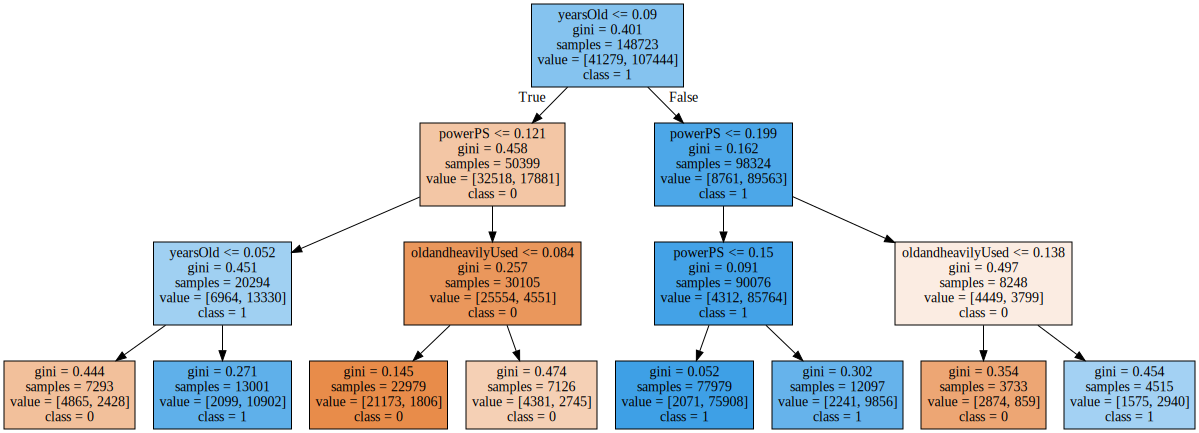

In [67]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# class labels
labels = training_fields[1:]

graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [68]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [69]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  89.3473459137258


In [70]:
predictions = clf_gini.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 66578.0
False positives: 5250.0
True Negatives: 22011.0
False Negatives: 5314.0
precision: 0.9269087264019602
recall: 0.9260835697991432
f1score: 0.926495964375174


# Decision Tree with criterion as information gain

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.4, random_state=0)

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

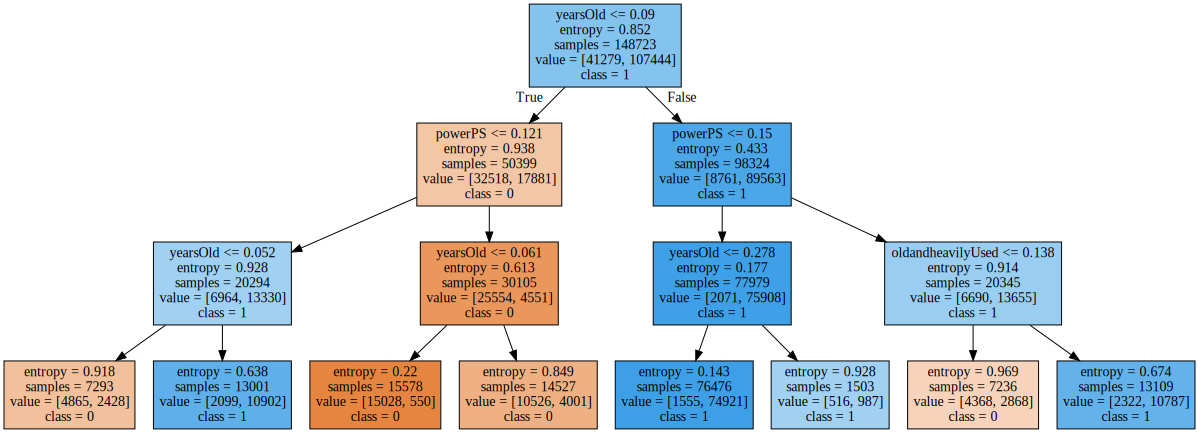

In [72]:
#Visualization:
labels = training_fields[1:]

graph = Source(tree.export_graphviz(clf_entropy, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [73]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

In [74]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  88.90659512450958


In [75]:
predictions = clf_entropy.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 65190.0
False positives: 4299.0
True Negatives: 22962.0
False Negatives: 6702.0
precision: 0.9381340931658249
recall: 0.9067768319145385
f1score: 0.9221889787170837


# Feature Importance

In [195]:
#print(RF.feature_importances_)

pd.concat((pd.DataFrame(X_train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(RF.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = 'true')

variable  importance
17             hybrid    0.000023
18                cng    0.000057
20         kleinwagen    0.000062
19            elektro    0.000245
7             porsche    0.000405
29                3er    0.000675
1                fiat    0.001375
31              corsa    0.001413
32                 a4    0.001496
3              toyota    0.001511
35                5er    0.001517
4              nissan    0.001608
16             andere    0.001612
6              jaguar    0.001628
5               skoda    0.001777
2                seat    0.001968
34              astra    0.002032
36           c_klasse    0.002158
37         volkswagen    0.002229
33             passat    0.002351
43            renault    0.003292
30               polo    0.003559
44           repaired    0.003592
28              fabia    0.003737
0                 kia    0.004357
26              coupe    0.004983
27               golf    0.005841
25                bus    0.006335
8   oldandheavilyUsed    0.006367
41               audi    0.006483
24                suv    0.006504
23              kombi    0.006785
40               opel    0.006856
38                bmw    0.008039
42               ford    0.011017
22          limousine    0.011235
15                lpg    0.011394
39      mercedes_benz    0.011968
45                NaN    0.012949
14             diesel    0.014272
21             cabrio    0.037385
13             benzin    0.050373
11           yearsOld    0.062450
9             powerPS    0.143296
10          kilometer    0.221753
12   gearbox_category    0.309032

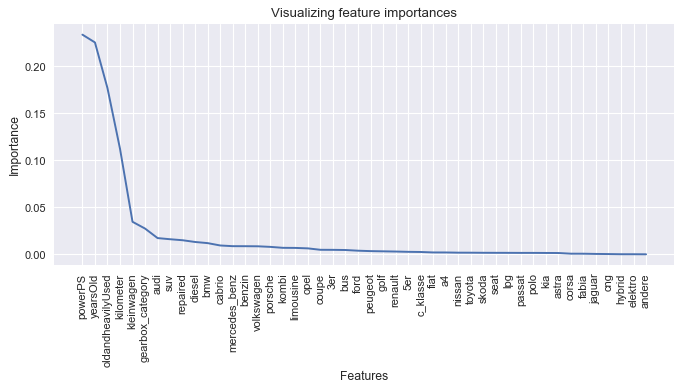

In [247]:
feature_importances = pd.DataFrame(RF.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
#Size of Plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')

plt.plot(feature_importances.index, feature_importances)
plt.title('Visualizing feature importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(index, rotation='90')

plt.show()

No handles with labels found to put in legend.


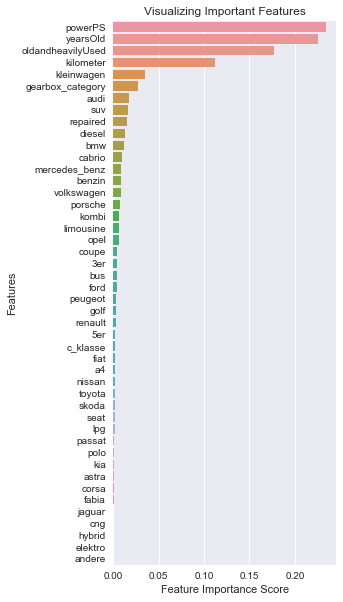

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
feature_imp = pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=False)
%matplotlib inline
fig, ax = plt.subplots(figsize=(4,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

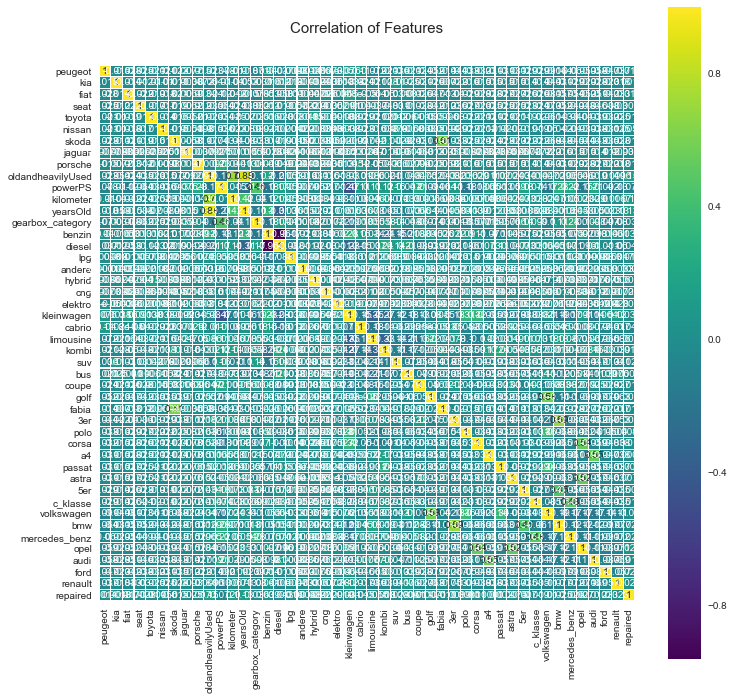

In [254]:
#Heat Map
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Random Forest, to limit overfitting without substantially increasing error due to bias

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Visualizing Random Forest

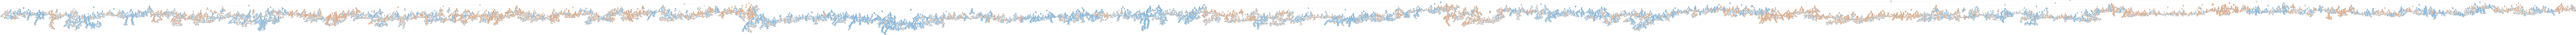

In [209]:
#Tree
estimator = RF.estimators_[5]
# Extract single tree
from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = index,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [197]:
predictions = RF.predict(X_test)
true_positives = 1.0
false_positives = 1.0
true_negatives = 1.0
false_negatives = 1.0
for i in range(0, len(y_test.values)):
    if (y_test.values[i] == predictions[i]):
        if (predictions[i] == 1.0):
            true_positives+=1.0
        else:
            true_negatives+=1.0
    else:
        if (predictions[i] == 1.0):
            false_positives += 1.0
        else:
            false_negatives += 1.0
            
print ("True positives:", true_positives)
print ("False positives:", false_positives)

print ("True Negatives:", true_negatives)
print ("False Negatives:", false_negatives)
prec = true_positives / (true_positives  + false_positives)
recall_score = true_positives / (true_positives  + false_negatives)
print ("precision:", prec)
print ("recall:", recall_score)
f1score = 2 * prec * recall_score / (prec + recall_score)
print ("f1score:", f1score)

True positives: 68836.0
False positives: 3029.0
True Negatives: 24232.0
False Negatives: 3056.0
precision: 0.9578515271689975
recall: 0.9574917932454237
f1score: 0.9576716264251479


# Classification Report : The classification_report function builds a text report showing the main classification metrics

In [198]:
p = RF.predict(X_test)
print(classification_report(y_test, p))

             precision    recall  f1-score   support

        0.0       0.89      0.89      0.89     27259
        1.0       0.96      0.96      0.96     71890

avg / total       0.94      0.94      0.94     99149



# OOB Errors for Random Forests

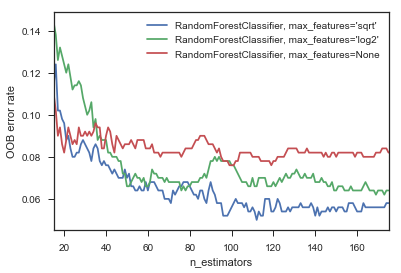

In [204]:
#Out-of-bag (OOB) error : The out-of-bag (OOB) error is the average error for each  calculated using predictions from the
# trees that do not contain  in their respective bootstrap sample. 
# This allows the RandomForestClassifier to be fit and validated whilst being trained 

import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

Errors = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in Errors)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in Errors:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [258]:
#  Model Accuracy, how often is the classifier correct?
accuracy_RF = round(RF.score(X_train, y_train) * 100, 2)
accuracy_RF

97.08